# Mushrooms Dataset Analysis

This dataset can be found on the UCI Machine Learning Repository. It is taken from The Audobon Society Field Guide and consists of 8123 entries corresponsing to 23 species of gilled mushroom in the Agaricus and Lepiota genera. Each entry has 22 features relating to the physical characteristics of each mushroom. It is categorical dataset and each species is identified as "edible", "poisonous", or of unknown edibility;which has been merged with "poisonous"

In [399]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [400]:
df = pd.read_csv('agaricus-lepiota.data')

In [401]:
df.shape

(8123, 23)

In [402]:
df.head()

,p,x,s,n,t,p.1,f,c,n.1,k,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
1,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
2,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
3,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
4,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g


In [403]:
df.columns

Index(['p', 'x', 's', 'n', 't', 'p.1', 'f', 'c', 'n.1', 'k', 'e', 'e.1', 's.1',
       's.2', 'w', 'w.1', 'p.2', 'w.2', 'o', 'p.3', 'k.1', 's.3', 'u'],
      dtype='object')

In [404]:
df.columns = (['poison_edible','cap_shape','cap_surface','cap_color','bruises','odor','gill_attachment','gill_spacing','gill_size','gill_color',
              'stalk_shape','stalk_root','stalk_surface_above_ring','stalk_surface_below_ring','stalk_color_above_ring',
              'stalk_color_below_ring','veil_type','veil_color','ring_number','ring_type','spore_print_color','population','habitat'])

In [405]:
df

,poison_edible,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
1,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
2,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
3,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
4,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8118,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8119,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8120,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8121,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [406]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8123 entries, 0 to 8122
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   poison_edible             8123 non-null   object
 1   cap_shape                 8123 non-null   object
 2   cap_surface               8123 non-null   object
 3   cap_color                 8123 non-null   object
 4   bruises                   8123 non-null   object
 5   odor                      8123 non-null   object
 6   gill_attachment           8123 non-null   object
 7   gill_spacing              8123 non-null   object
 8   gill_size                 8123 non-null   object
 9   gill_color                8123 non-null   object
 10  stalk_shape               8123 non-null   object
 11  stalk_root                8123 non-null   object
 12  stalk_surface_above_ring  8123 non-null   object
 13  stalk_surface_below_ring  8123 non-null   object
 14  stalk_color_above_ring  

### Here we can see the description of what each value represents. We saved them as dictionaries for further use:

In [407]:
poison_edible = {'e': 'edible', 'p': 'poisonous'}
cap_shape = {'b': 'bell', 'c': 'conical', 'x': 'convex', 'f': 'flat', 'k': 'knobbed', 's': 'sunken'}
cap_surface = {'s': 'smooth', 'y': 'scaly', 'f': 'fibrous', 'g': 'grooves'}
cap_color = {'y': 'yellow', 'w': 'white', 'g': 'gray', 'n': 'brown', 'e': 'red', 'p': 'pink', 'b': 'buff', 'u': 'purple', 'c': 'cinnamon', 'r': 'green'}
odor = {'a': 'almond', 'l': 'anise', 'p': 'pungent', 'n': 'none', 'f': 'foul', 'c': 'creosote', 'y': 'fishy', 's': 'spicy', 'm': 'musty'}
gill_attachment = {'f': 'free', 'a': 'attached'}
gill_spacing = {'c': 'close', 'w': 'crowded'}
gill_size = {'b': 'broad', 'n': 'narrow'}
gill_color = {'k': 'black', 'n': 'brown', 'g': 'gray', 'p': 'pink', 'w': 'white', 'h': 'chocolate', 'u': 'purple', 'e': 'red', 'b': 'buff', 'r': 'green', 'y': 'yellow', 'o': 'orange'}
stalk_shape = {'e': 'enlarging', 't': 'tapering'}
#stalk_root = {'c': 'club', 'e': 'equal', 'b': 'bulbous', 'r': 'rooted', '?': None}
stalk_surface_above_ring = {'s': 'smooth', 'f': 'fibrous', 'k': 'silky', 'y': 'scaly'}
stalk_surface_below_ring = {'s': 'smooth', 'f': 'fibrous', 'k': 'silky', 'y': 'scaly'}
stalk_color_above_ring = {'w': 'white', 'g': 'gray', 'p': 'pink', 'n': 'brown', 'b': 'buff', 'e': 'red', 'o': 'orange', 'c': 'cinnamon', 'y': 'yellow'}
stalk_color_below_ring = {'w': 'white', 'g': 'gray', 'p': 'pink', 'n': 'brown', 'b': 'buff', 'e': 'red', 'o': 'orange', 'c': 'cinnamon', 'y': 'yellow'}
veil_color = {'n': 'brown', 'w': 'white', 'o': 'orange', 'y': 'yellow'}
ring_number = {'o': 1, 't': 2, 'n': 0}
ring_type = {'p': 'pendant', 'e': 'evanescent', 'l': 'large', 'f': 'flaring', 'n': 'none'}
spore_print_color = {'n': 'brown', 'k': 'black', 'u': 'purple', 'h': 'chocolate', 'w': 'white', 'r': 'green', 'o': 'orange', 'y': 'yellow', 'b': 'buff'}
population = {'n': 'numerous', 's': 'scattered', 'a': 'abundant', 'v': 'several', 'y': 'solitary', 'c': 'clustered'}
habitat = {'g': 'grasses', 'm': 'meadows', 'u': 'urban', 'd': 'woods', 'p': 'paths', 'w': 'waste', 'l': 'leaves'}

dict_list = {
    'poison_edible': poison_edible , 
    'cap_shape': cap_shape, 
    'cap_surface': cap_surface, 
    'cap_color': cap_color, 
    'odor': odor,
    'gill_attachment': gill_attachment,
    'gill_spacing': gill_spacing, 
    'gill_size': gill_size, 
    'gill_color': gill_color, 
    'stalk_shape': stalk_shape, 
    #'stalk_root': stalk_root,
    'stalk_surface_above_ring': stalk_surface_above_ring,
    'stalk_surface_below_ring': stalk_surface_below_ring, 
    'stalk_color_above_ring': stalk_color_above_ring,
    'stalk_color_below_ring': stalk_color_below_ring, 
    'veil_color': veil_color,
    'ring_number': ring_number, 
    'ring_type': ring_type,
    'spore_print_color':spore_print_color,
    'population': population, 
    'habitat': habitat
    }

### "?" label is actually defined to denote missing values. Therefore we replace them with NaN values and find out how many they are. As we see all the null values are in one column, so it's better to drop that column.

In [408]:
df = df.replace({'?':np.NaN})

In [409]:
df.isnull().sum()

poison_edible                  0
cap_shape                      0
cap_surface                    0
cap_color                      0
bruises                        0
odor                           0
gill_attachment                0
gill_spacing                   0
gill_size                      0
gill_color                     0
stalk_shape                    0
stalk_root                  2480
stalk_surface_above_ring       0
stalk_surface_below_ring       0
stalk_color_above_ring         0
stalk_color_below_ring         0
veil_type                      0
veil_color                     0
ring_number                    0
ring_type                      0
spore_print_color              0
population                     0
habitat                        0
dtype: int64

In [410]:
df = df.drop(columns='stalk_root')

### Next we find the percentages of edible and poisonous mushrooms

In [411]:
print('Percentage of edible and poisonous mushrooms')
p_e_percent = df['poison_edible'].value_counts(normalize=True)*100
p_e_percent

Percentage of edible and poisonous mushrooms


e    51.803521
p    48.196479
Name: poison_edible, dtype: float64

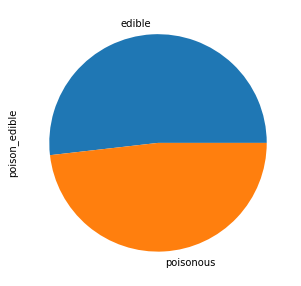

In [412]:
p_e_percent.plot.pie(figsize=(5, 5), labels = [poison_edible['e'], poison_edible['p']])

In [413]:
print('Total number of edible and poisonous mushrooms')
df['poison_edible'].value_counts()

Total number of edible and poisonous mushrooms


e    4208
p    3915
Name: poison_edible, dtype: int64

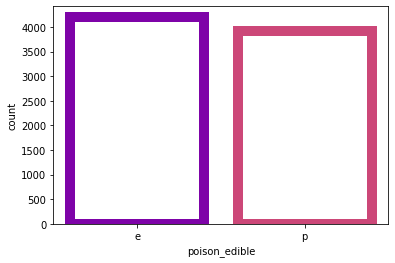

In [414]:
sns.countplot(x='poison_edible',data=df,facecolor=(0, 0,0,0),
                   linewidth=10,edgecolor=sns.color_palette("plasma", 3));

In [415]:
df.describe(include='all')

,poison_edible,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
count,8123,8123,8123,8123,8123,8123,8123,8123,8123,8123,...,8123,8123,8123,8123,8123,8123,8123,8123,8123,8123
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3655,3244,2283,4748,3528,7913,6811,5612,1728,...,4935,4463,4383,8123,7923,7487,3967,2388,4040,3148


In [416]:
df.nunique().sort_values(ascending=False)

gill_color                  12
cap_color                   10
odor                         9
spore_print_color            9
stalk_color_below_ring       9
stalk_color_above_ring       9
habitat                      7
cap_shape                    6
population                   6
ring_type                    5
veil_color                   4
stalk_surface_below_ring     4
stalk_surface_above_ring     4
cap_surface                  4
ring_number                  3
bruises                      2
stalk_shape                  2
gill_attachment              2
gill_spacing                 2
gill_size                    2
poison_edible                2
veil_type                    1
dtype: int64

### Here we notice that the veil-type has one label and therefore provides us with no additional information. Therefore we dop the column.


In [417]:
df.shape

(8123, 22)

In [418]:
df = df.drop(columns='veil_type')
df.shape

(8123, 21)

In [419]:
df['bruises'].loc[(df['bruises'] == 't')] = True
df['bruises'].loc[(df['bruises'] == 'f')] = False

In [420]:
df.head()

,poison_edible,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_above_ring,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,e,x,s,y,True,a,f,c,b,k,...,s,s,w,w,w,o,p,n,n,g
1,e,b,s,w,True,l,f,c,b,n,...,s,s,w,w,w,o,p,n,n,m
2,p,x,y,w,True,p,f,c,n,n,...,s,s,w,w,w,o,p,k,s,u
3,e,x,s,g,False,n,f,w,b,k,...,s,s,w,w,w,o,e,n,a,g
4,e,x,y,y,True,a,f,c,b,n,...,s,s,w,w,w,o,p,k,n,g


In [421]:
plot_df = df.copy()
for d in dict_list:
    plot_df[d] = plot_df[d].apply(lambda col: dict_list[d][col])

### Now we will try to get some information about the different characteristics of the mushrooms, and visualize them

#### First we can see the frequency of mushrooms in each group for some of the characteristics:

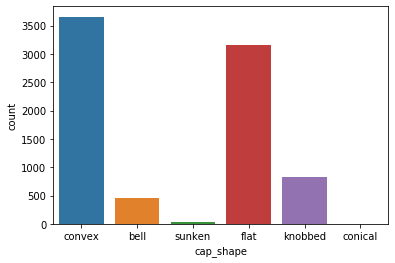

In [422]:
sns.countplot(x='cap_shape', data=plot_df)

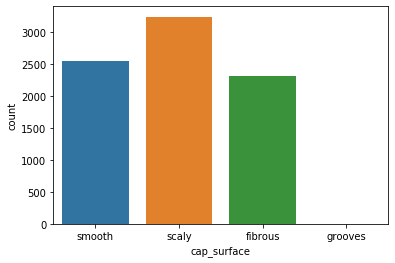

In [423]:
sns.countplot(x='cap_surface',data=plot_df)

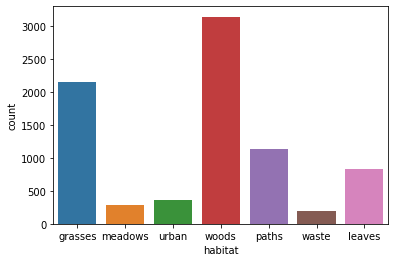

In [424]:
sns.countplot(x='habitat',data=plot_df)

#### As we can see, there is a lot of difference between the frequencies of different groups, and the difference between maximum and minimum counts is high. In other words, the data is not balanced.

### Now we take a closer look at the distribution of different characteristics in either poisonous or edible mushrooms.
#### For this purpose, first we create a dataframe which includes the label encoded data of our dataset, and then we can create our plot:

In [425]:
df_copy = df.copy()

In [426]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for column in df_copy.columns:
    df_copy[column] = labelencoder.fit_transform(df_copy[column])

In [427]:
df_copy

,poison_edible,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_above_ring,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
1,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
2,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
3,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1
4,0,5,3,9,1,0,1,0,0,5,...,2,2,7,7,2,1,4,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8118,0,3,2,4,0,5,0,0,0,11,...,2,2,5,5,1,1,4,0,1,2
8119,0,5,2,4,0,5,0,0,0,11,...,2,2,5,5,0,1,4,0,4,2
8120,0,2,2,4,0,5,0,0,0,5,...,2,2,5,5,1,1,4,0,1,2
8121,1,3,3,4,0,8,1,0,1,0,...,2,1,7,7,2,1,0,7,4,2


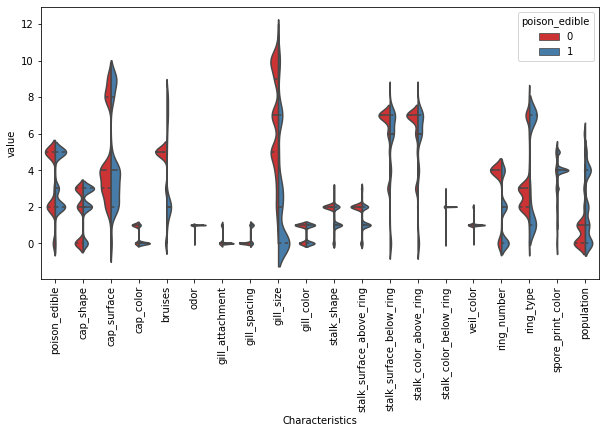

In [428]:
df_cls = pd.melt(df_copy, "poison_edible", var_name="Characteristics")
fig, ax = plt.subplots(figsize=(10,5))
p = sns.violinplot(ax = ax, x="Characteristics", y="value", hue="poison_edible", split = True, data=df_cls, inner = 'quartile', palette = 'Set1')
p.set_xticklabels(rotation = 90, labels = list(df_copy.columns));

### The next phase is correlation, in this case we  measure  the stength of a relationship. Since it is a categorigal data we used Cramer's V.
#### Cramer's V is a measure of association between nominal variables, giving a value between 0 and 1, with a score tending to 1 denoting and 0 for least associatian a strong association. It is based on the chi squared statistic.

### Cramer's formula
$$\phi_c = \sqrt{\frac{\chi^2}{N(k - 1)}}$$

In [429]:
import scipy.stats as ss

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [430]:
cramers = pd.DataFrame()
for i, a in enumerate(df1.columns):
    cramers.loc[a, a] = 1.0
    for b in df1.columns[:i]:
        val = round(cramers_v(df1[a], df1[b]), 2)
        cramers.loc[a,b] = val
        cramers.loc[b,a] = val
cramers.head()

,poison_edible,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface-above_ring,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_color,ring_number,ring_type,spore_print_color,population,habitat
poison_edible,1.00,0.14,0.07,0.48,0.44,0.97,0.07,0.26,0.21,0.52,...,0.71,0.70,0.59,0.57,0.04,0.12,0.72,0.82,0.33,0.37
cap_shape,0.14,1.00,0.20,0.20,0.23,0.28,0.23,0.14,0.26,0.18,...,0.20,0.15,0.24,0.25,0.37,0.27,0.23,0.26,0.30,0.33
cap_surface,0.07,0.20,1.00,0.27,0.23,0.23,0.07,0.38,0.17,0.15,...,0.24,0.28,0.28,0.28,0.04,0.11,0.24,0.13,0.35,0.32
cap_color,0.48,0.20,0.27,1.00,0.42,0.41,0.22,0.33,0.36,0.23,...,0.36,0.40,0.30,0.30,0.07,0.34,0.42,0.40,0.27,0.36
bruises,0.44,0.23,0.23,0.42,1.00,0.62,0.06,0.44,0.04,0.55,...,0.72,0.70,0.55,0.57,0.04,0.13,0.89,0.51,0.36,0.46


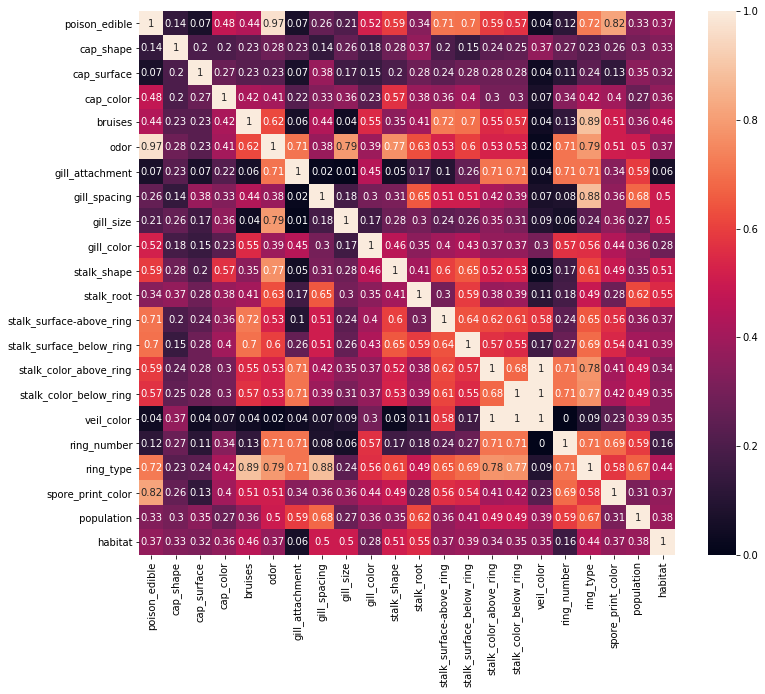

In [431]:
plt.figure(figsize=(12,10))
sns.heatmap(cramers, annot=True, vmin=0, vmax=1);

#### Some of the information that can be infered from the map:
 * the odor of mushrooms is highly related to them being pisionous or edible
 * The ring type is related to if the mushrooms bruise or not, and it is also related to gill spacing
 * in general, a characteristic such as ring type, has more correlations with other features, and veil color is less correlated to the other features.

#### We tried another method for finding the correlations, called ***Theil's U***, or the uncertainty coefficient, which we suppose may give a more precise result for our dataset:

In [432]:
import math
from collections import Counter

In [433]:
def conditional_entropy(x, y):
    y_counter = Counter(y)
    xy_counter = Counter(list(zip(x, y)))
    total_occurrences = sum(y_counter.values())
    entropy = 0.0
    for xy in xy_counter.keys():
        p_xy = xy_counter[xy] / total_occurrences
        p_y = y_counter[xy[1]] / total_occurrences
        entropy += p_xy * math.log(p_y / p_xy)
    return entropy

def theils_u(x, y):
    s_xy = conditional_entropy(x,y)
    x_counter = Counter(x)
    total_occurrences = sum(x_counter.values())
    p_x = list(map(lambda n: n/total_occurrences, x_counter.values()))
    s_x = ss.entropy(p_x)
    if s_x == 0:
        return 1
    else:
        return (s_x - s_xy) / s_x

In [434]:
theil = pd.DataFrame()
for i, a in enumerate(df.columns):
    theil.loc[a, a] = 1.0
    for b in df.columns:
        theil.loc[a,b] = round(theils_u(df[b], df[a]), 2)
        theil.loc[b,a] = round(theils_u(df[a], df[b]), 2)
theil.head()

,poison_edible,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_above_ring,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_color,ring_number,ring_type,spore_print_color,population,habitat
poison_edible,1.00,0.03,0.02,0.01,0.20,0.39,0.08,0.16,0.26,0.14,...,0.23,0.19,0.13,0.12,0.12,0.09,0.21,0.22,0.10,0.07
cap_shape,0.05,1.00,0.03,0.04,0.06,0.08,0.07,0.01,0.10,0.06,...,0.03,0.02,0.05,0.05,0.08,0.10,0.09,0.10,0.09,0.08
cap_surface,0.03,0.03,1.00,0.04,0.01,0.07,0.19,0.17,0.07,0.06,...,0.05,0.05,0.09,0.09,0.21,0.04,0.09,0.06,0.10,0.07
cap_color,0.04,0.07,0.07,1.00,0.04,0.25,0.25,0.19,0.20,0.18,...,0.13,0.16,0.20,0.20,0.24,0.19,0.28,0.22,0.17,0.21
bruises,0.19,0.03,0.01,0.02,1.00,0.17,0.12,0.12,0.12,0.12,...,0.26,0.22,0.12,0.12,0.10,0.01,0.33,0.14,0.04,0.11


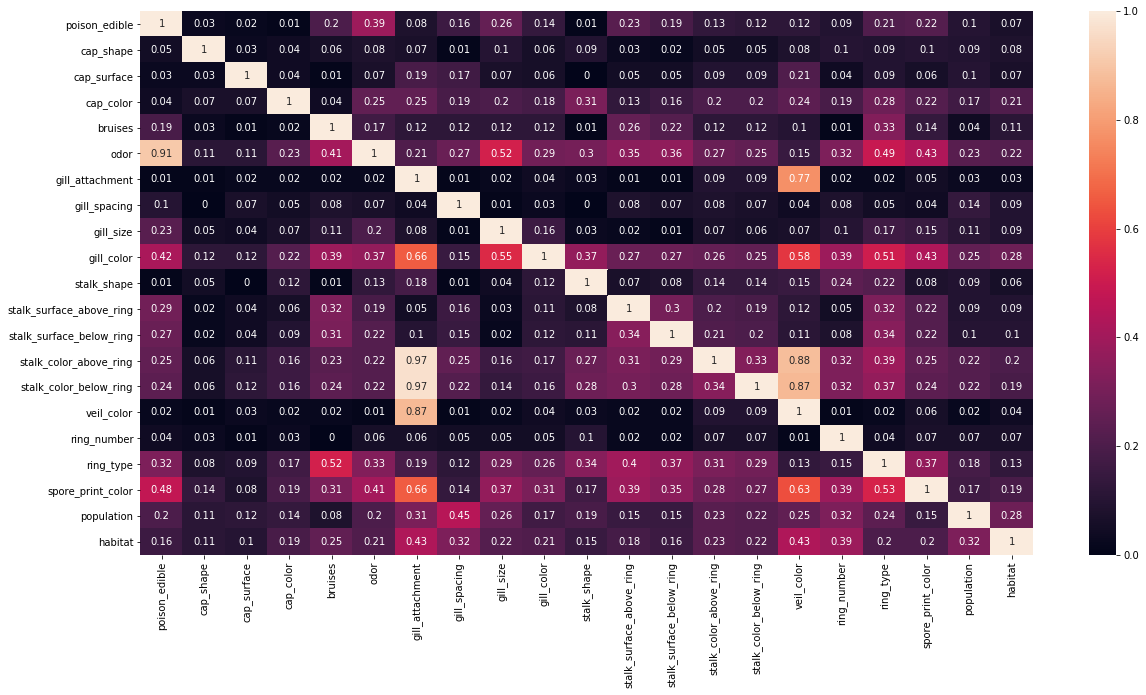

In [435]:
plt.figure(figsize=(20,10))
sns.heatmap(theil, annot=True, vmin=0, vmax=1);

### For the next step, we devide our dataset into edible and poisonous mushrooms, to compare the feautures of each group:

In [436]:
mushroom_e = plot_df[plot_df['poison_edible']=='edible']

In [437]:
mushroom_p = plot_df[plot_df['poison_edible']=='poisonous']

In [438]:
mushroom_e.shape

(4208, 21)

In [439]:
mushroom_p.shape

(3915, 21)

In [440]:
def sample_figures():
    
    fig, subfigs = plt.subplots(2, 4, figsize=(16, 8))
    fig.subplots_adjust(hspace=.5)
    mushroom_e['cap_shape'].value_counts().plot.bar(ax=subfigs[0,0],title='edible',legend=True,colormap = 'gist_rainbow_r')
    mushroom_p['cap_shape'].value_counts().plot.bar(ax=subfigs[0,1],title='poisonous',legend=True,colormap = 'gist_rainbow_r')
    mushroom_e['cap_surface'].value_counts().plot.bar(ax=subfigs[0,2],title='edible',legend=True,colormap = 'Accent_r')
    mushroom_p['cap_surface'].value_counts().plot.bar(ax=subfigs[0,3],title='poisonous',legend=True,colormap = 'Accent_r')
    mushroom_e['cap_color'].value_counts().plot.bar(ax=subfigs[1,0],title='edible',legend=True,colormap = 'PuBuGn_r')
    mushroom_p['cap_color'].value_counts().plot.bar(ax=subfigs[1,1],title='poisonous',legend=True,colormap = 'PuBuGn_r')
    mushroom_e['bruises'].value_counts().plot.bar(ax=subfigs[1,2],title='edible',legend=True,colormap = 'plasma_r')
    mushroom_p['bruises'].value_counts().plot.bar(ax=subfigs[1,3],title='poisonous',legend=True,colormap = 'plasma_r')


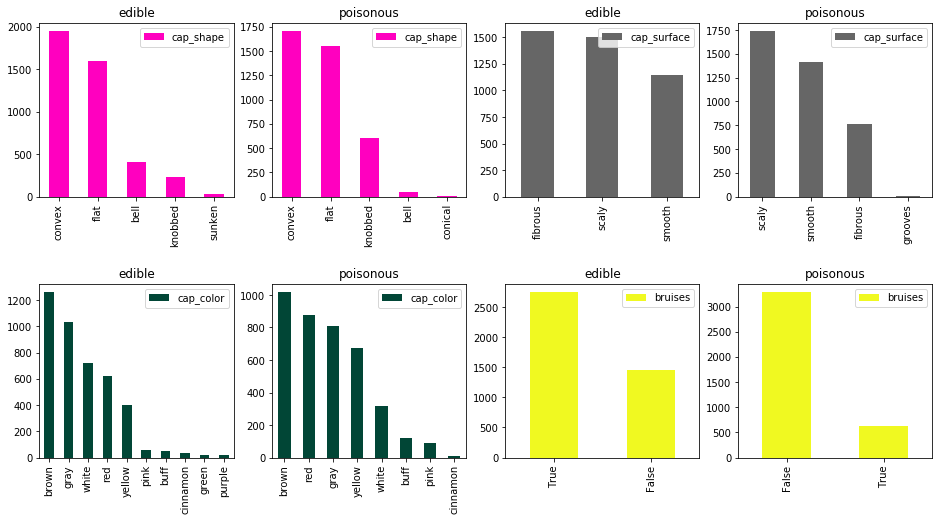

In [441]:
sample_figures()

#### From these plots, some points can be infered:
 * As we saw before, cap shape is not related to the mushrooms being edible or poisonous, and as we see in the plot, both of these groups have convex as their most frequent cap shape. As for the other plots, there are differences in the feautures but not a determinative difference
 * But about the last plot, we can see that the number of poisonous mushrooms which bruise is far less that those which don't, and this is almost the opposite for the edible mushrooms.

In [442]:
def sample_figures1():
    
    fig, subfigs = plt.subplots(2, 4, figsize=(16, 8))
    fig.subplots_adjust(hspace=.5)
    mushroom_e['odor'].value_counts().plot.bar(ax=subfigs[0,0],title='edible',legend=True,colormap = 'bwr')
    mushroom_p['odor'].value_counts().plot.bar(ax=subfigs[0,1],title='poisonous',legend=True,colormap = 'bwr')
    mushroom_e['gill_attachment'].value_counts().plot.bar(ax=subfigs[0,2],title='edible',legend=True,colormap = 'Wistia')
    mushroom_p['gill_attachment'].value_counts().plot.bar(ax=subfigs[0,3],title='poisonous',legend=True,colormap = 'Wistia')
    mushroom_e['gill_spacing'].value_counts().plot.bar(ax=subfigs[1,0],title='edible',legend=True,colormap = 'PRGn_r')
    mushroom_p['gill_spacing'].value_counts().plot.bar(ax=subfigs[1,1],title='poisonous',legend=True,colormap = 'PRGn_r')
    mushroom_e['gill_size'].value_counts().plot.bar(ax=subfigs[1,2],title='edible',legend=True,colormap = 'Reds_r')
    mushroom_p['gill_size'].value_counts().plot.bar(ax=subfigs[1,3],title='poisonous',legend=True,colormap = 'Reds_r')

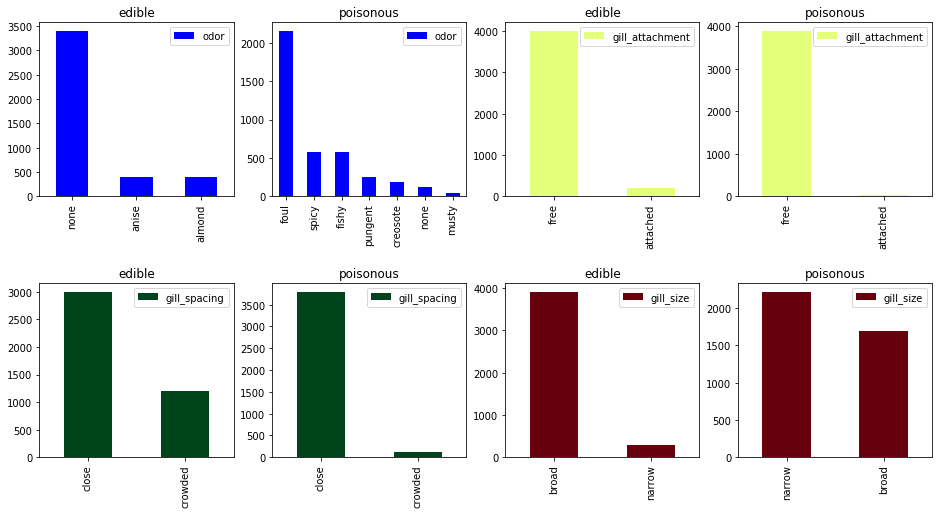

In [443]:
sample_figures1()

In [444]:
type_odor = pd.crosstab(df["poison_edible"], df["odor"])
type_odor.index = ["edible", "poisonous"]

columns = []
for col in type_odor.columns.values:
    columns.append(odor[col])
    
type_odor.columns = columns

type_odor

,almond,creosote,foul,anise,musty,none,pungent,spicy,fishy
edible,400,0,0,400,0,3408,0,0,0
poisonous,0,192,2160,0,36,120,255,576,576


#### As we can see, the type of a mushroom (poisonous or edible) is almost completely determinable by its odor. We also chose two other co-dependent features from the correlation map to cross tabulate:

In [445]:
spc_ga = pd.crosstab(df["gill_attachment"], df["spore_print_color"])
spc_ga.index = ["attached", "free"]

columns = []
for col in spc_ga.columns.values:
    columns.append(spore_print_color[col])
    
spc_ga.columns = columns

spc_ga

,buff,chocolate,black,brown,orange,green,purple,white,yellow
attached,48,0,0,48,48,0,0,18,48
free,0,1632,1871,1920,0,72,48,2370,0


In [446]:
def sample_figures2():
    
    fig, subfigs = plt.subplots(2, 4, figsize=(16, 8))
    fig.subplots_adjust(hspace=.5)
    mushroom_e['gill_color'].value_counts().plot.bar(ax=subfigs[0,0],title='edible',legend=True,colormap = 'bwr_r')
    mushroom_p['gill_color'].value_counts().plot.bar(ax=subfigs[0,1],title='poisonous',legend=True,colormap = 'bwr_r')
    mushroom_e['stalk_shape'].value_counts().plot.bar(ax=subfigs[0,2],title='edible',legend=True,colormap = 'seismic')
    mushroom_p['stalk_shape'].value_counts().plot.bar(ax=subfigs[0,3],title='poisonous',legend=True,colormap = 'seismic')
    mushroom_e['ring_type'].value_counts().plot.bar(ax=subfigs[1,0],title='edible',legend=True)
    mushroom_p['ring_type'].value_counts().plot.bar(ax=subfigs[1,1],title='poisonous',legend=True)
    mushroom_e['veil_color'].value_counts().plot.bar(ax=subfigs[1,2],title='edible',legend=True,colormap = 'seismic_r')
    mushroom_p['veil_color'].value_counts().plot.bar(ax=subfigs[1,3],title='poisonous',legend=True,colormap = 'seismic_r')

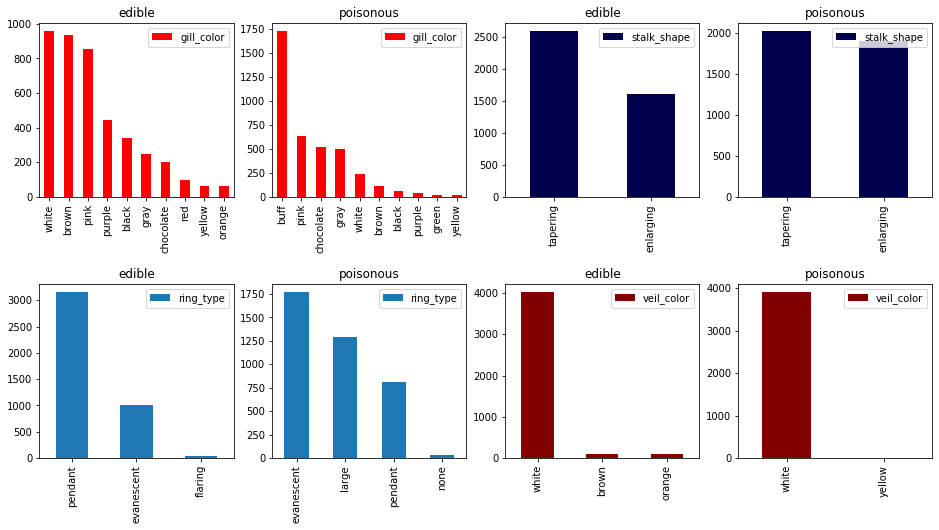

In [447]:
sample_figures2()

In [458]:
def sample_figures3():
    
    fig, subfigs = plt.subplots(2, 4, figsize=(16, 8))
    fig.subplots_adjust(hspace=.5)
    mushroom_e['stalk_surface_above_ring'].value_counts().plot.bar(ax=subfigs[0,0],title='edible',legend=True,colormap = 'jet_r')
    mushroom_p['stalk_surface_above_ring'].value_counts().plot.bar(ax=subfigs[0,1],title='poisonous',legend=True,colormap = 'jet_r')
    mushroom_e['stalk_surface_below_ring'].value_counts().plot.bar(ax=subfigs[0,2],title='edible',legend=True,)
    mushroom_p['stalk_surface_below_ring'].value_counts().plot.bar(ax=subfigs[0,3],title='poisonous',legend=True)
    mushroom_e['stalk_color_above_ring'].value_counts().plot.bar(ax=subfigs[1,0],title='edible',legend=True,colormap = 'rainbow_r')
    mushroom_p['stalk_color_above_ring'].value_counts().plot.bar(ax=subfigs[1,1],title='poisonous',legend=True,colormap = 'rainbow_r')
    mushroom_e['stalk_color_below_ring'].value_counts().plot.bar(ax=subfigs[1,2],title='edible',legend=True,colormap = 'jet')
    mushroom_p['stalk_color_below_ring'].value_counts().plot.bar(ax=subfigs[1,3],title='poisonous',legend=True,colormap = 'jet')

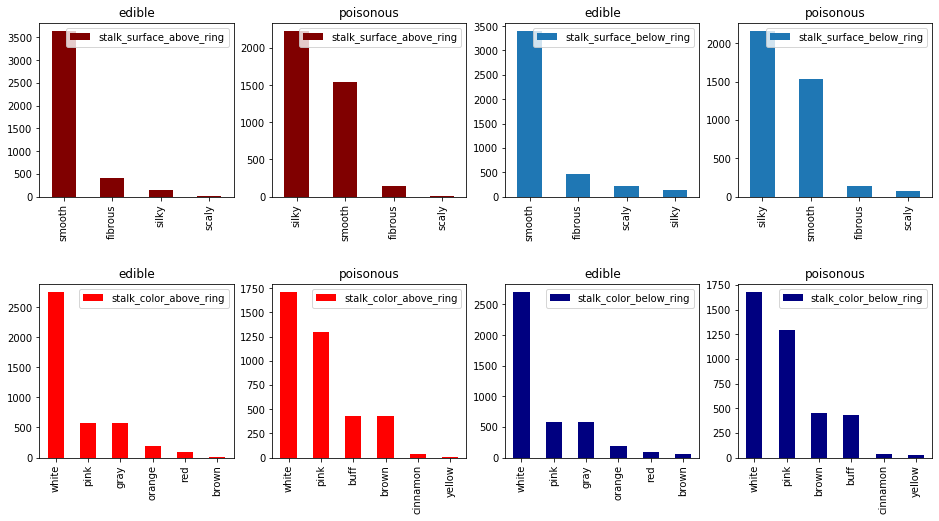

In [459]:
sample_figures3()

In [468]:
def sample_figures4():
    
    fig, subfigs = plt.subplots(2, 4, figsize=(16, 10))
    fig.subplots_adjust(hspace=.5)
    mushroom_e['ring_number'].value_counts().plot.bar(ax=subfigs[0,0],title='edible',legend=True,colormap = 'coolwarm')
    mushroom_p['ring_number'].value_counts().plot.bar(ax=subfigs[0,1],title='poisonous',legend=True,colormap = 'coolwarm')
    mushroom_e['spore_print_color'].value_counts().plot.bar(ax=subfigs[0,2],title='edible',legend=True,colormap = 'PRGn_r')
    mushroom_p['spore_print_color'].value_counts().plot.bar(ax=subfigs[0,3],title='poisonous',legend=True,colormap = 'PRGn_r')
    mushroom_e['population'].value_counts().plot.bar(ax=subfigs[1,0],title='edible',legend=True,colormap = 'jet')
    mushroom_p['population'].value_counts().plot.bar(ax=subfigs[1,1],title='poisonous',legend=True,colormap = 'jet')
    mushroom_e['habitat'].value_counts().plot.bar(ax=subfigs[1,2],title='edible',legend=True,colormap = 'spring')
    mushroom_p['habitat'].value_counts().plot.bar(ax=subfigs[1,3],title='poisonous',legend=True,colormap = 'spring')

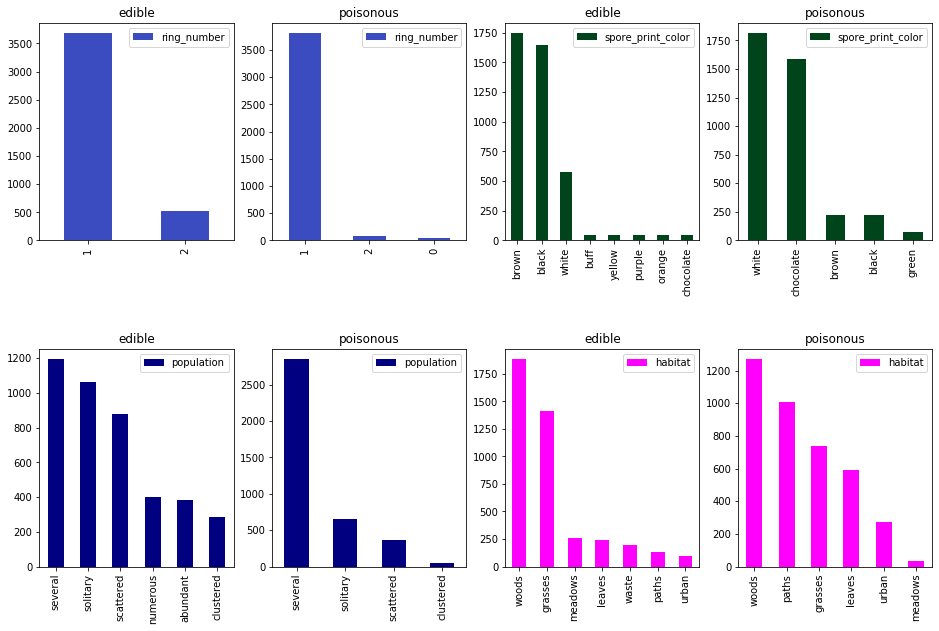

In [469]:
sample_figures4()